# Task 3: Sales Prediction using Python


## Importing Modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the dataset

In [5]:
df = pd.read_csv("C:\\Users\\Vishnu Prasad\\Documents\\oibsip\\archive (3)\\Advertising.csv")
df


,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [16]:
df.head(100)


,TV,Radio,Newspaper,Sales
0,230,37,69,22
1,44,39,45,10
2,17,45,69,9
3,151,41,58,18
4,180,10,58,12
...,...,...,...,...
95,163,31,52,16
96,197,3,5,11
97,184,21,22,15
98,289,42,51,25


In [17]:
df.tail(100)

,TV,Radio,Newspaper,Sales
100,222,4,49,11
101,296,36,100,23
102,280,10,21,14
103,187,17,17,14
104,238,34,5,20
...,...,...,...,...
195,38,3,13,7
196,94,4,8,9
197,177,9,6,12
198,283,42,66,25


In [18]:
df['TV'] = df['TV'].astype(int)
df['Radio'] = df['Radio'].astype(int)
df['Newspaper'] = df['Newspaper'].astype(int)
df['Sales'] = df['Sales'].astype(int)
df


,TV,Radio,Newspaper,Sales
0,230,37,69,22
1,44,39,45,10
2,17,45,69,9
3,151,41,58,18
4,180,10,58,12
...,...,...,...,...
195,38,3,13,7
196,94,4,8,9
197,177,9,6,12
198,283,42,66,25


In [20]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [22]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.055388,0.055569,0.778044
Radio,0.055388,1.000000,0.352552,0.579960
Newspaper,0.055569,0.352552,1.000000,0.229429
Sales,0.778044,0.579960,0.229429,1.000000


## Data Visualization

<BarContainer object of 200 artists>

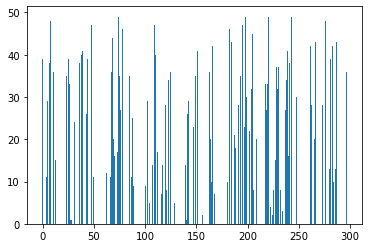

In [25]:
plt.bar(df['TV'],df['Radio'])


<BarContainer object of 200 artists>

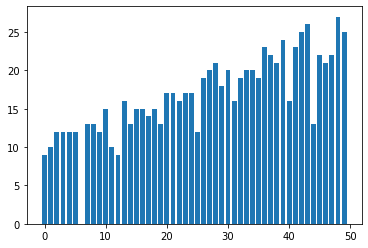

In [27]:
plt.bar(df['Radio'],df['Sales'])


In [29]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [31]:
from sklearn.model_selection import train_test_split

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

## Scaling the Data

In [37]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()


In [41]:
x_train_scaled = sc.fit_transform(x_train)

In [43]:
x_test_scaled = sc.fit_transform(x_test)
x_test_scaled

array([[ 0.31350707,  0.4449903 ,  0.72998755],
       [ 0.66800269,  1.51564365,  0.72998755],
       [ 1.74256755,  0.2442428 ,  0.39176938],
       [-1.37034714,  0.77956947,  0.46692898],
       [ 0.94495239,  1.64947532, -1.11142249],
       [-0.6613559 ,  0.71265364,  0.72998755],
       [ 0.90064044,  1.24798031, -0.20950737],
       [-0.9383056 , -0.89332639, -0.54772554],
       [ 0.96710837, -1.42865306, -0.73562452],
       [ 0.44644292, -0.15725221, -0.05918818],
       [-1.14878738, -0.02342054, -1.14900229],
       [-0.87183767, -1.2948214 , -0.13434777],
       [ 1.10004423, -1.42865306,  1.93254105],
       [-1.43681507,  0.31115863, -0.88594371],
       [ 0.04763535, -1.4955689 , -0.24708716],
       [ 0.39105298, -1.16098973,  0.09113101],
       [-1.41465909,  0.2442428 ,  0.31660979],
       [ 0.69015867, -0.09033638, -0.69804473],
       [-0.6613559 , -0.29108388, -0.02160838],
       [ 1.13327819,  0.17732696, -0.81078412],
       [ 1.04465429,  0.51190613,  1.556

## using linear regression method to train the model

In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
lr = LinearRegression()

In [50]:
lr.fit(x_train_scaled,y_train)

LinearRegression()

In [52]:
y_pred = lr.predict(x_test_scaled)

In [54]:
from sklearn.metrics import r2_score

## finding accuracy

In [57]:
lr.score(x_test_scaled,y_test)


0.8811836354878553

In [58]:
p=np.array([0.31350707,  0.4449903 ,  0.72998755])
lr.predict([p])

array([16.13398824])